In [16]:
import requests as r

In [212]:
url = '''https://www.meesho.com/men-watches/pl/3k7'''

print(url)

https://www.meesho.com/men-watches/pl/3k7


In [213]:
response = r.get(url)
# response.content

In [214]:
#  pip install selenium

In [215]:
from selenium import webdriver

loc = r"C:\Users\Lenovo\Downloads\chromedriver-win64\chromedriver-win64\chromedriver.exe"

print(loc)

C:\Users\Lenovo\Downloads\chromedriver-win64\chromedriver-win64\chromedriver.exe


In [216]:
cService  = webdriver.ChromeService(executable_path=loc)

driver = webdriver.Chrome(service = cService)


driver.get(url)
data = driver.page_source
# data
print('done')

done


In [217]:
driver.close()

In [205]:
from bs4 import BeautifulSoup

In [36]:
soup = BeautifulSoup(data,'html.parser')
# soup
print('done')

done


In [219]:
import re
import pandas as pd
from datetime import datetime

all_data = {'watch_name':[],'price':[],'rating':[],'no_of_reviews':[]}

for i in soup.find_all('div',{'class':'sc-ftTHYK bAACl NewProductCardstyled__StyledDetailsCard-sc-6y2tys-1 NewProductCardstyled__StyledDesktopDetailsCard-sc-6y2tys-3 jvYVXh eSUhOk NewProductCardstyled__StyledDetailsCard-sc-6y2tys-1 NewProductCardstyled__StyledDesktopDetailsCard-sc-6y2tys-3 jvYVXh eSUhOk'}):
    
    data = i.text.strip().split('₹')
    if len(data) == 2:
        watch_name,other_details = data
        price, r_r_data = other_details.strip().split(' onwardsFree Delivery')
        rating = r_r_data[:3]
        
        
        review_det = r_r_data[3:].split(' ')
        if len(review_det) == 2:
            all_data['no_of_reviews'].append(review_det[0])
        else:
            all_data['no_of_reviews'].append(0)
            
        all_data['rating'].append(rating)
        all_data['price'].append(price)
        all_data['watch_name'].append(watch_name.strip())
        
    elif len(data) == 3:
        watch_name,price,other_details = data
        all_data['price'].append(price.split(' ')[0])
        all_data['watch_name'].append(watch_name)

        pt = r'\d\.\d'
        result = re.findall(pt,other_details)
        all_data['rating'].append(result[0])
        
        
        
        pt = r'\d\.\d(\d{1,}) Reviews'
        result = re.findall(pt,other_details)
        all_data['no_of_reviews'].append(result[0])

cur_time = datetime.now()
table = pd.DataFrame(all_data)

table['Scrapped_time'] = cur_time

table

,watch_name,price,rating,no_of_reviews,Scrapped_time
0,Men's Elegant Watches Vol 13,284,4.1,371,2024-07-06 11:50:00.208686
1,Stylish Men Watches,150,3.9,866,2024-07-06 11:50:00.208686
2,Attractive Men Analog Watches,233,3.8,1466,2024-07-06 11:50:00.208686
3,Alluring Men Watches,200,3.8,0,2024-07-06 11:50:00.208686
4,Latest Men Watches,129,3.6,24,2024-07-06 11:50:00.208686
5,Men's Elegant Watches Vol 17,363,3.8,72,2024-07-06 11:50:00.208686
6,Unique Men Watches,179,3.2,6,2024-07-06 11:50:00.208686
7,Classic Men Watches,174,3.5,67,2024-07-06 11:50:00.208686
8,Latest Men Analog Watches,136,3.8,429,2024-07-06 11:50:00.208686
9,Trendy Men Watches,190,3.4,22,2024-07-06 11:50:00.208686


In [227]:
def scrapped_meesho(url):
    import re
    import pandas as pd
    from datetime import datetime
    from selenium import webdriver
    import time
    from bs4 import BeautifulSoup 
    import warnings
    warnings.filterwarnings('ignore')
        
    loc = r"C:\Users\Lenovo\Downloads\chromedriver-win64\chromedriver-win64\chromedriver.exe"
    
    cService  = webdriver.ChromeService(executable_path=loc)

    driver = webdriver.Chrome(service = cService)


    driver.get(url)
    data = driver.page_source
    
    time.sleep(5)
    
    driver.close()
    
    soup = BeautifulSoup(data,'html.parser')
    
    temp_data = url.split('/')
    temp_data.remove('')
    prod_name = temp_data[2]
    
    
    
    all_image = []
    
    for i in soup.find_all('div',{'class':'NewProductCardstyled__ProductImage-sc-6y2tys-18 iWWQS'}):
        for j in i.find_all('img',src=True):
            if '.png' not in j['src']:
    #             print(c,j['src'])
                response = r.get(j['src'])
                bytes_data = response.content
                all_image.append(bytes_data)
#     print(len(all_image))

    all_data = {prod_name:[],'price':[],'rating':[],'no_of_reviews':[],'Images':all_image}
    
    for i in soup.find_all('div',{'class':'sc-ftTHYK bAACl NewProductCardstyled__StyledDetailsCard-sc-6y2tys-1 NewProductCardstyled__StyledDesktopDetailsCard-sc-6y2tys-3 jvYVXh eSUhOk NewProductCardstyled__StyledDetailsCard-sc-6y2tys-1 NewProductCardstyled__StyledDesktopDetailsCard-sc-6y2tys-3 jvYVXh eSUhOk'}):

        data = i.text.strip().split('₹')
        if len(data) == 2:
            watch_name,other_details = data
            price, r_r_data = other_details.strip().split(' onwardsFree Delivery')
            rating = r_r_data[:3]


            review_det = r_r_data[3:].split(' ')
            if len(review_det) == 2:
                all_data['no_of_reviews'].append(review_det[0])
            else:
                all_data['no_of_reviews'].append(0)

            all_data['rating'].append(rating)
            all_data['price'].append(price)
            all_data[prod_name].append(watch_name.strip())

        elif len(data) == 3:
            watch_name,price,other_details = data
            all_data['price'].append(price.split(' ')[0])
            all_data[prod_name].append(watch_name)

            pt = r'\d\.\d'
            result = re.findall(pt,other_details)
            all_data['rating'].append(result[0])



            pt = r'\d\.\d(\d{1,}) Reviews'
            result = re.findall(pt,other_details)
            all_data['no_of_reviews'].append(result[0])

    cur_time = datetime.now()
    table = pd.DataFrame(all_data)
    table['rating'].replace('','0',inplace=True)
    
    table['Scrapped_time'] = cur_time

    return table

In [228]:
url = '''https://www.meesho.com/belts-men/pl/3nn'''
# url = '''https://www.meesho.com/jeans-women/pl/3kc'''


all_table = scrapped_meesho(url)

for i in range(1,2):
    url = f'''https://www.meesho.com/belts-men/pl/3nn?page={i}'''
    try:
        all_table = pd.concat([all_table,scrapped_meesho(url)],axis = 0)
        print(f'{i} Page scrapped')
    except Exception as e:
        print(e)
        
all_table

1 Page scrapped


,belts-men,price,rating,no_of_reviews,Images,Scrapped_time
0,Casual Latest Men Belts,"1,075",3.8,0,b'RIFF\x00r\x00\x00WEBPVP8X\n\x00\x00\x00\x08\...,2024-07-06 11:55:59.339919
1,Casual Modern Men Belts,172,4.1,1626,b'RIFF\xfc-\x00\x00WEBPVP8X\n\x00\x00\x00\x08\...,2024-07-06 11:55:59.339919
2,Fashionable Unique Men Belts,244,3.9,9265,b'RIFF\xd24\x00\x00WEBPVP8X\n\x00\x00\x00\x08\...,2024-07-06 11:55:59.339919
3,Styles Latest Men Belts,182,0,0,b'RIFF\x18\xfa\x00\x00WEBPVP8X\n\x00\x00\x00\x...,2024-07-06 11:55:59.339919
4,Styles Trendy Men Belts,166,4.1,2622,b'RIFF\xfc+\x00\x00WEBPVP8X\n\x00\x00\x00\x08\...,2024-07-06 11:55:59.339919
5,Casual Unique Men Belts,304,4.2,10,b'RIFF^T\x00\x00WEBPVP8X\n\x00\x00\x00\x08\x00...,2024-07-06 11:55:59.339919
6,Fancy Modern Men Belts,229,0,0,b'RIFF\x84P\x00\x00WEBPVP8X\n\x00\x00\x00\x08\...,2024-07-06 11:55:59.339919
7,Casual Modern Men Belts,180,3.9,4507,b'RIFF\xf6s\x00\x00WEBPVP8X\n\x00\x00\x00\x08\...,2024-07-06 11:55:59.339919
8,Styles Latest Men Belts,202,3.9,57,b'RIFF<L\x00\x00WEBPVP8X\n\x00\x00\x00\x08\x00...,2024-07-06 11:55:59.339919
9,Styles Trendy Men Belts,628,3.9,84,b'RIFF\xe84\x00\x00WEBPVP8X\n\x00\x00\x00\x08\...,2024-07-06 11:55:59.339919


In [139]:
# pd.concat([all_data,scrapped_meesho(url)],axis = 1)

In [142]:
all_table.to_csv(r"C:\Users\Lenovo\Desktop\Meesho_data\belts-men.csv",index=False)
print('done')

done


In [153]:
# all_table['price'] = all_table['price'].str.replace(',','').astype('float')
# all_table['no_of_reviews'] = all_table['no_of_reviews'].str.replace(',','').astype('float')
# all_table['rating'] = all_table['rating'].str.replace(',','').astype('float')



<Axes: xlabel='rating'>

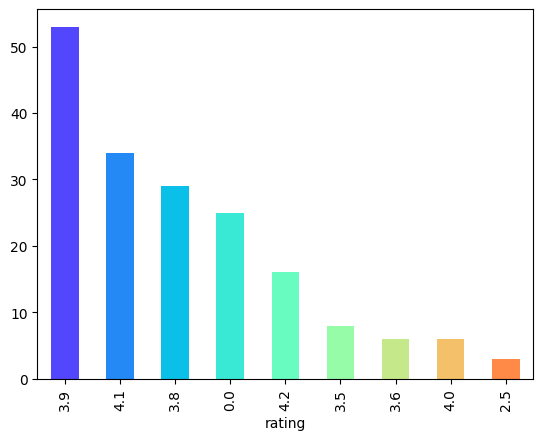

In [179]:
all_table['rating'].value_counts().plot(kind='bar',color = sns.color_palette('rainbow',10))

In [165]:
all_table.sort_values(by='price').head(5)

,belts-men,price,rating,no_of_reviews,Scrapped_time
16,Fashionable Modern Men Belts,118.0,3.8,2266.0,2024-07-06 11:30:48.380518
14,Fashionable Modern Men Belts,118.0,3.8,2266.0,2024-07-06 11:31:17.867872
13,Fashionable Modern Men Belts,118.0,3.8,2266.0,2024-07-06 11:32:41.864527
12,Fashionable Modern Men Belts,118.0,3.8,2266.0,2024-07-06 11:31:50.093606
12,Fashionable Modern Men Belts,118.0,3.8,2266.0,2024-07-06 11:31:59.877888


In [166]:
all_table.sort_values(by='price').tail(5)

,belts-men,price,rating,no_of_reviews,Scrapped_time
3,Casual Latest Men Belts,1075.0,3.8,NaN,2024-07-06 11:31:17.867872
4,Casual Latest Men Belts,1075.0,3.8,NaN,2024-07-06 11:31:50.093606
3,Casual Latest Men Belts,1075.0,3.8,NaN,2024-07-06 11:32:10.267575
3,Casual Latest Men Belts,1075.0,3.8,NaN,2024-07-06 11:30:48.380518
3,Casual Latest Men Belts,1075.0,3.8,NaN,2024-07-06 11:32:41.864527


<Axes: xlabel='price'>

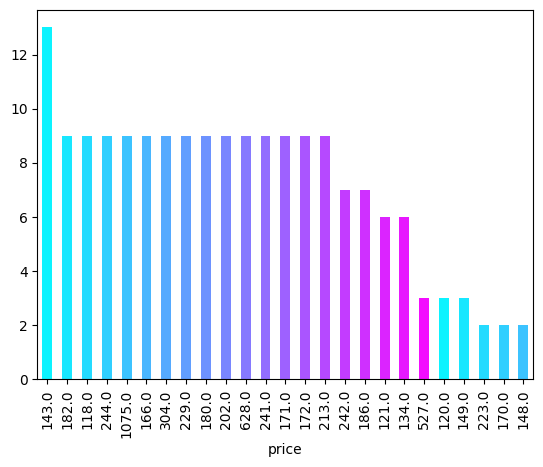

In [177]:
import seaborn as sns
all_table['price'].value_counts().plot(kind='bar',color = sns.color_palette('cool',20))

20


In [248]:
img_byte = all_table['Images'][3].values[0]

In [249]:
with open('tem_image.jpg','wb') as f:
    f.write(img_byte)
    
print('done')

done


In [250]:
import IPython

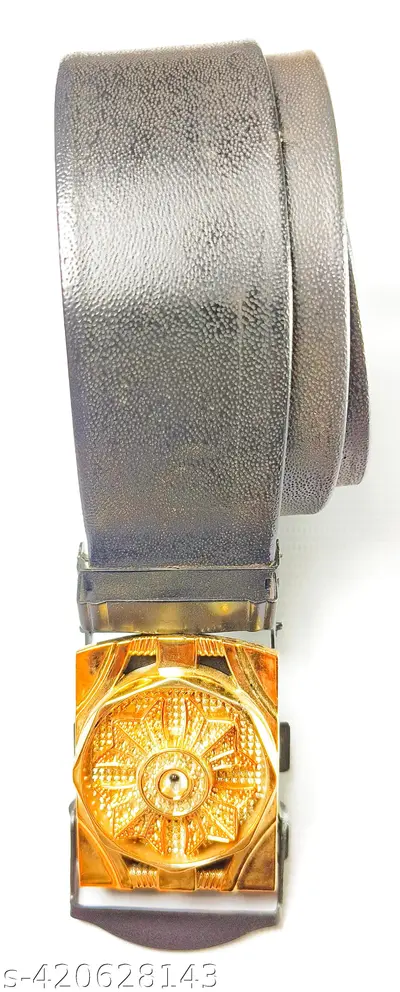

In [251]:
IPython.display.Image('tem_image.jpg')

# task: Threading, Nuakri Web scrap